In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
#continents for color coding the countries
cpath = 'csse_covid_19_data\\csse_covid_19_time_series\\country_continent.csv'
countries =  pd.read_csv(cpath)

In [4]:
path = 'csse_covid_19_data\\csse_covid_19_time_series\\time_series_19-covid-'
files = ['Confirmed', 'Deaths']
suffix = '.csv'

conf = pd.read_csv(path + files[0] + suffix)#, usecols=[0,1,2,5,6])
conf = conf.drop(columns=['Lat','Long'])
conf.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,2,1,2,2,4,4,7,7,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,110,117,130,138,150,150,160,178,178,200


In [5]:
conf.rename(columns = {'Province/State':'state'}, inplace = True) 
conf.rename(columns = {'Country/Region':'country'}, inplace = True) 
conf.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,2,1,2,2,4,4,7,7,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,50,50,83,93,99,117,129,149,149,197


In [6]:
dateformat = '%m/%d/%y'
start = conf.columns[2] 
start = datetime.strptime(start,dateformat)

end = conf.columns[len(conf.columns)-1]
end = datetime.strptime(end,dateformat)

print(start,end)

#to match column names
dateformat = '%#m/%#d/%y'

2020-01-22 00:00:00 2020-03-13 00:00:00


In [7]:
colors = dict(zip(
    #["Europe", "South America", "Asia", "Oceania", "North America", "Africa"],
    ["Oceania", "North America", "Africa", "Europe", "South America", "Asia"],
    ["#abd9e9", "#d73027", "#74add1", "#fc8d59", "#fee090", "#4575b4"]
))
continent = countries.set_index('country')['continent'].to_dict()


In [12]:
def draw_barchart(date, data=conf, excludeChina = True):
    #dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    current_date = date.strftime(dateformat)
    #print(current_date)
    df = data.groupby('country', as_index=False).sum().sort_values(by=current_date, ascending = False).nlargest(35,current_date)
    #.tail(30)
    if excludeChina == True:
        df = df[df['country'] != 'China']
        suffix = '(excluding China)'
    else:
        suffix = ''
    df = df[::-1]
    
    ax.clear()
    ax.barh(df['country'], df[current_date], color=[colors[continent[x]] for x in df['country']])
    for i, (value, name) in enumerate(zip(df[current_date], df['country'])):
    #for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        #ax.text(value, i,     name,           size=12, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value, i,     value,  size=12, ha='left',  va='center')
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=20, ha='right', weight=800)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    #ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Confirmed Coronavirus cases since Jan 22, 2020 ' + suffix,
            transform=ax.transAxes, size=20, weight=600, ha='left', va='top')
    plt.box(False)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
draw_barchart(start)

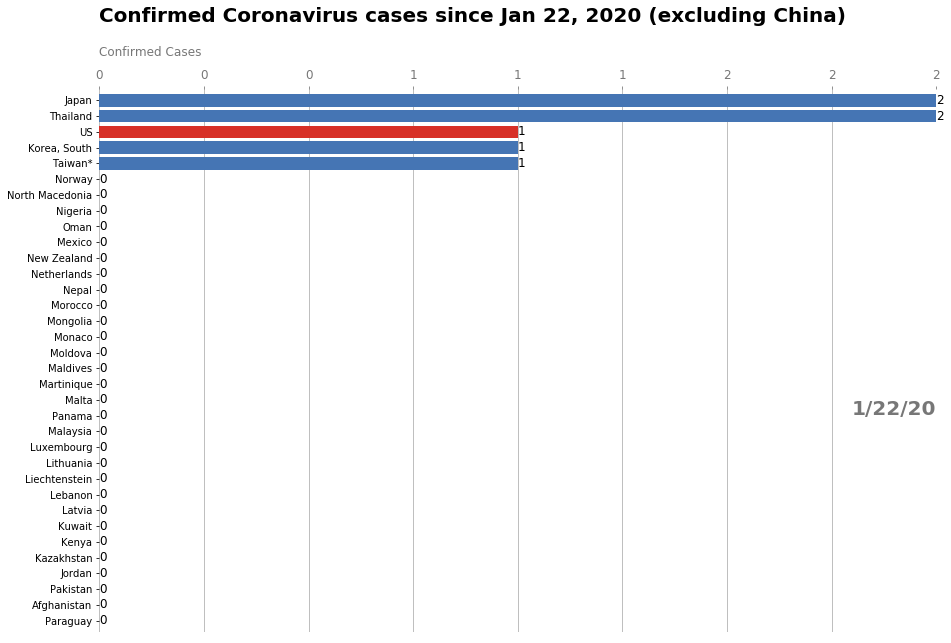

In [13]:
#animation

fig, ax = plt.subplots(figsize=(15, 10))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), fargs=[death, False])
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start, end), interval = 250)
#HTML(animator.to_jshtml())

# or use animator.to_html5_video() or animator.save() 
animator.save('covid19.gif', writer='pillow')